# Preprocessing

In [78]:
# impirt important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# read data
airline_data = pd.read_csv('../../data/dataset/airline.csv')
cache_map_data = pd.read_csv('../../data/dataset/cache_map.csv')
group_data = pd.read_csv('../../data/dataset/group.csv')
order_data = pd.read_csv('../../data/dataset/order.csv')
day_schedule_data = pd.read_csv('../../data/dataset/day_schedule.csv')

# lion_cache 保留
print('\n \n  !!!!!!!!!!!!!!!!!!!!!!!!!!!!  警告  !!!!!!!!!!!!!!!!!!!!!!!!　\n  \n  lion_cache data is ignored temporarily. \n \n ')

# test and train data
train_data = pd.read_csv('../../data/training-set.csv')
test_data = pd.read_csv('../../data/testing-set.csv')

/Users/kuanyao.huang/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



 
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!  警告  !!!!!!!!!!!!!!!!!!!!!!!!　
  
  lion_cache data is ignored temporarily. 
 
 


## have a look of each dataset

### airline_data

In [80]:
airline_data.head(5)

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [81]:
airline_data.describe()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
count,104275,104275,104275,104275,104275,104275
unique,48796,2,60216,204,60377,207
top,85c9b81cde3f2ca53424198d37189024,去程,2017/1/31 22:05,TPE 桃園機場,2018/2/17 11:15,TPE 桃園機場
freq,8,52223,10,40984,10,41125


In [82]:
airline_data['group_id'].value_counts(ascending=False)

85c9b81cde3f2ca53424198d37189024    8
9bcb042a7052030d5c8b27bf50cacaea    8
64613                               7
20056                               7
55392                               6
60712                               6
15665                               6
27686                               6
58545                               6
07bf7ab7aaed82f1146a4f8f8bdefc38    6
30633                               6
10451                               6
22169                               6
26077                               6
34579                               6
1438                                6
cd95c968370c5524279ec1d42850df86    6
5876                                6
58d00377df174c92be9cde3dd96973c3    6
340854cb5f13a18cf073fdf56a21b3b4    6
b99de2199f93a3912e2cb8fecf72c40c    6
58913                               6
58309                               6
c1d3df3fa5086e075cd159b40c211fe0    6
5a4a63230333ff9fd6dea8473e8a1807    6
4569                                6
65440       

In [83]:
airline_data[airline_data['group_id'] == '85c9b81cde3f2ca53424198d37189024']

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
103675,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 11:50,TPE 桃園機場,2018/4/1 13:55,HKG 香港機場
103676,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 13:20,KHH 高雄機場,2018/4/1 14:55,HKG 香港機場
103677,85c9b81cde3f2ca53424198d37189024,去程,2018/4/1 19:05,HKG 香港機場,2018/4/1 23:40,AUH 阿布達比機場
103678,85c9b81cde3f2ca53424198d37189024,去程,2018/4/2 03:20,AUH 阿布達比機場,2018/4/2 05:05,CAI 開羅機場
103679,85c9b81cde3f2ca53424198d37189024,回程,2018/4/9 13:30,CAI 開羅機場,2018/4/9 18:55,AUH 阿布達比機場
103680,85c9b81cde3f2ca53424198d37189024,回程,2018/4/9 21:50,AUH 阿布達比機場,2018/4/10 10:05,HKG 香港機場
103681,85c9b81cde3f2ca53424198d37189024,回程,2018/4/10 13:10,HKG 香港機場,2018/4/10 15:10,TPE 桃園機場
103682,85c9b81cde3f2ca53424198d37189024,回程,2018/4/10 12:40,HKG 香港機場,2018/4/10 14:10,KHH 高雄機場


> Brief Summart：group_id is not distinct. It includes "transfering" and "different start/end points". <<<<<

In [84]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104275 entries, 0 to 104274
Data columns (total 6 columns):
group_id       104275 non-null object
go_back        104275 non-null object
fly_time       104275 non-null object
src_airport    104275 non-null object
arrive_time    104275 non-null object
dst_airport    104275 non-null object
dtypes: object(6)
memory usage: 4.8+ MB


### cache_map

In [85]:
cache_map_data.head(5)

,file_name,url
0,lion_cache_1.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
1,lion_cache_2.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
2,lion_cache_3.jpg,https://www.liontravel.com/Comm/2trs/hotsale/p...
3,lion_cache_4.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
4,lion_cache_5.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...


In [86]:
cache_map_data.describe()

,file_name,url
count,321,321
unique,321,321
top,lion_cache_204.jpg,http://www.liontravel.com/Comm/2TRS/HotSale/ph...
freq,1,1


In [87]:
cache_map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
file_name    321 non-null object
url          321 non-null object
dtypes: object(2)
memory usage: 5.1+ KB


> Campaign pictures

### group_data

In [88]:
group_data.head(5)

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
1,53481,subline_value_1,area_value_1,12.0,17-May-17,112900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
2,54305,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
3,41766,subline_value_1,area_value_1,12.0,12-Jul-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
4,32196,subline_value_1,area_value_1,12.0,9-Aug-17,126900.0,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [89]:
group_data[group_data['group_id'] == '85c9b81cde3f2ca53424198d37189024']

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
49062,85c9b81cde3f2ca53424198d37189024,subline_value_20,area_value_133,10.0,1-Apr-18,59900.0,"《早鳥最高折$10,000》【雙雄經典埃及】法老傳奇~五星尼羅河遊輪、神秘金字塔、人面獅身像...","&lt;hr size=""5"" align=""center"" noshade width=""..."


In [90]:
group_data['group_id'].value_counts(ascending=False)

9841                                1
7242                                1
14999                               1
36403                               1
5967                                1
56ddb603f28a54b503e91daea5909ea7    1
44217                               1
4396                                1
02dc2347a26ce3f0facd0dd438db381a    1
46532                               1
46239                               1
18449                               1
64055                               1
44310                               1
26468                               1
11422                               1
47068                               1
32407                               1
630112f4550c8f29af31159b5f8fb938    1
66882                               1
12382cf9a53c7e2e8a33095359d7c78f    1
13dd07582517e154175657586c4a18a7    1
d22cdf4d02dd73a69c10caca058d79c9    1
44289                               1
1797                                1
44607                               1
12022       

> group_id is Distinct

In [91]:
group_data.describe()

,days,price
count,49223.000000,49223.000000
mean,6.245962,34705.866871
std,2.024880,20509.189141
min,2.000000,3000.000000
25%,5.000000,20900.000000
50%,5.000000,29900.000000
75%,8.000000,39900.000000
max,17.000000,222900.000000


In [92]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49223 entries, 0 to 49222
Data columns (total 8 columns):
group_id          49223 non-null object
sub_line          49223 non-null object
area              49223 non-null object
days              49223 non-null float64
begin_date        49223 non-null object
price             49223 non-null float64
product_name      49218 non-null object
promotion_prog    49167 non-null object
dtypes: float64(2), object(6)
memory usage: 3.0+ MB


### order_data

In [93]:
order_data.head(5)

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1


In [94]:
order_data['order_id'].value_counts(ascending=False)

7a6a01cd80c117bce3f6c8f078fefba4    1
140561                              1
140588                              1
140589                              1
140590                              1
140591                              1
140592                              1
140593                              1
140595                              1
140596                              1
140597                              1
140598                              1
140599                              1
140600                              1
140601                              1
140602                              1
140603                              1
140604                              1
140605                              1
140606                              1
140607                              1
140608                              1
140609                              1
140587                              1
140586                              1
140585                              1
140572      

In [95]:
order_data['group_id'].value_counts(ascending=False)

1ac092064f6c132cb8786e49ace26919    131
24090                               120
f68ed6afdc9d542e99ef3927170d51a2     97
940bce72ed54dddf3d2206c81adb7714     95
8757b740e6dd2cd4e730540e8a0ad889     90
9b0d9ffa368f02933edae4dcbb99ea0f     85
1ecb0b256fec43b37c49351565172630     84
2dec5f667d4127f7ec4b53fdb3c648dd     81
67701f688c96ba8aeaf30504cbbabefa     80
13727                                79
35175                                77
2e5e7020e2920e32a98afdc0aa57fee9     76
6366b16fdc103b2abe83001f00d882dd     76
e71867e34531d025475161e4711ba1ec     76
e04b5c1519341a58a3f1b091a3d3c64e     76
67945                                75
a10348a24975c09dc60baa23e189ba49     74
b7725a86b826ece55837b8c2c168a515     74
767d8df2986ae384cc69d543bdf3f073     73
288245f5d937907c193ba7a92b5593dd     73
36788                                71
6c9d32a133862865b5b7b6389f978e80     71
ebcb7e56010de9acfe2df4c292e93717     71
34466                                71
bd37617e599d658eb08b8622819639c2     71


In [96]:
order_data[order_data['group_id'] == '1ac092064f6c132cb8786e49ace26919']

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
354540,5a3c1ed39d05298b6e407aee1107779f,1ac092064f6c132cb8786e49ace26919,19-Mar-18,src1_value_1,src2_value_1,unit_value_1,2
354541,c5b94ca35d2e2957fabd5c8d9b018aae,1ac092064f6c132cb8786e49ace26919,20-Mar-18,src1_value_1,src2_value_1,unit_value_72,2
354542,4785cf83a7f834abf42b23d02b92a374,1ac092064f6c132cb8786e49ace26919,23-Feb-18,src1_value_2,src2_value_3,unit_value_6,2
354543,62b9ce454f5a371541ae5b08557ca2e9,1ac092064f6c132cb8786e49ace26919,7-Mar-18,src1_value_1,src2_value_1,unit_value_1,2
354544,d495ad05cc8528e085d4cfc0bc383cd6,1ac092064f6c132cb8786e49ace26919,7-Mar-18,src1_value_1,src2_value_4,unit_value_1,2
354545,b213cce5abcab627ffada14e2543d3b4,1ac092064f6c132cb8786e49ace26919,16-Mar-18,src1_value_2,src2_value_3,unit_value_6,2
354546,ed0f24379f18d3ec6040c5880c2f960a,1ac092064f6c132cb8786e49ace26919,7-Mar-18,src1_value_1,src2_value_1,unit_value_1,3
354547,4b200437a8bb45c7061d27894c608429,1ac092064f6c132cb8786e49ace26919,12-Mar-18,src1_value_1,src2_value_1,unit_value_1,3
354548,a32847b6beb1470212f16db385a944b0,1ac092064f6c132cb8786e49ace26919,6-Mar-18,src1_value_1,src2_value_1,unit_value_1,1
354549,45b7e7bb0782c97f7514c0d73b5a4c5b,1ac092064f6c132cb8786e49ace26919,23-Feb-18,src1_value_1,src2_value_1,unit_value_65,3


In [97]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396915 entries, 0 to 396914
Data columns (total 7 columns):
order_id         396915 non-null object
group_id         396915 non-null object
order_date       396915 non-null object
source_1         396915 non-null object
source_2         396915 non-null object
unit             396915 non-null object
people_amount    396915 non-null int64
dtypes: int64(1), object(6)
memory usage: 21.2+ MB


> order_id is unique (based on 注文者、数人OK)

> group_id is not unique

### day_schedule_data

In [98]:
day_schedule_data.head(15)

,group_id,day,title
0,63695,1.0,台北 [AIR]歐胡島市區觀光【州政府．皇宮．國王銅像．中國城】
1,63695,2.0,夏威夷小環島【鑽石頭山．恐龍灣．噴泉口】－珍珠港[BOATS]豪華愛之船Star of Ho...
2,63695,3.0,夏威夷 [AIR] 舊金山
3,63695,4.0,舊金山市區觀光【藝術宮．金門大橋．金門公園．漁人碼頭．金門灣遊船．市政廳．雙子峰．九曲花街】
4,63695,5.0,舊金山－300KM－優勝美地國家公園－100KM－佛雷斯諾
5,63695,6.0,佛雷斯諾－380KM－巴斯托《名牌大賣場》－260KM－拉斯維加斯
6,63695,7.0,拉斯維加斯－200KM－大峽谷【西峽「天空步道」一日遊】－200KM－拉斯維加斯
7,63695,8.0,拉斯維加斯─450KM─洛杉磯市區觀光【中國戲院．星光大道．好萊塢杜比戲院 Dolby Th...
8,63695,9.0,洛杉磯190KM－聖地牙哥【海景火車－[BOATS]聖地牙哥港灣遊船－舊城區】
9,63695,10.0,洛杉磯【環球影城製片廠(哈利波特主題樂園)】


### train_data

In [99]:
train_data.head(5)

,order_id,deal_or_not
0,136100,0
1,140370,0
2,211009,0
3,41571,1
4,64125,1


In [100]:
train_data['order_id'].value_counts(ascending=False)

2047      1
88702     1
283359    1
338672    1
330484    1
328437    1
332535    1
174848    1
172801    1
178946    1
176899    1
166660    1
164613    1
170758    1
168711    1
191240    1
189193    1
285406    1
279261    1
291547    1
320201    1
305856    1
309954    1
307907    1
301766    1
299719    1
322248    1
326346    1
293594    1
324299    1
         ..
114077    1
107934    1
109983    1
23969     1
103832    1
17826     1
19875     1
30116     1
32165     1
26022     1
28071     1
105881    1
126359    1
93575     1
75150     1
71048     1
73097     1
66954     1
69003     1
79244     1
81293     1
77199     1
124310    1
120208    1
122257    1
116114    1
118163    1
128404    1
130453    1
2049      1
Name: order_id, Length: 297020, dtype: int64

In [101]:
train_data.describe()

,order_id,deal_or_not
count,297020.000000,297020.000000
mean,156583.192866,0.197253
std,95659.738870,0.397925
min,1.000000,0.000000
25%,75101.750000,0.000000
50%,150249.500000,0.000000
75%,234075.250000,0.000000
max,340111.000000,1.000000


In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297020 entries, 0 to 297019
Data columns (total 2 columns):
order_id       297020 non-null int64
deal_or_not    297020 non-null int64
dtypes: int64(2)
memory usage: 4.5 MB


In [103]:
train_data['order_id'] = train_data['order_id'].astype(object)

In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297020 entries, 0 to 297019
Data columns (total 2 columns):
order_id       297020 non-null object
deal_or_not    297020 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.5+ MB


### test_data

In [105]:
test_data.head(5)

,order_id,deal_or_not
0,3240332c374b21f9882f899f13b71308,NaN
1,bf0c0a570b848499180b9dbd49a12d76,NaN
2,0db30b8d4770f5145d932133e54a35a1,NaN
3,d3eaffe7c163fabadd8bff4aa28ee1c1,NaN
4,fefb2b6d55df4474e4826ddac2a97465,NaN


In [106]:
test_data['order_id'].describe()

count                                99895
unique                               99895
top       ecf4ecaa01a7543a2147ee13b8c720d5
freq                                     1
Name: order_id, dtype: object

In [107]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99895 entries, 0 to 99894
Data columns (total 2 columns):
order_id        99895 non-null object
 deal_or_not    0 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


### Have a look of order_id (make sure we can have each order detail even there are two patterns of order_id

(array([9.00000e+00, 0.00000e+00, 9.00000e+01, 0.00000e+00, 8.90000e+02,
        0.00000e+00, 8.90000e+03, 0.00000e+00, 8.89760e+04, 1.98155e+05]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

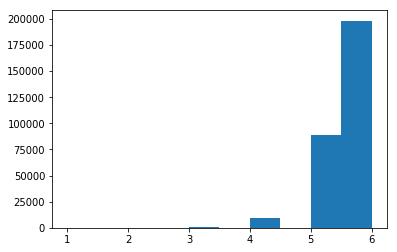

In [108]:
plt.hist(train_data.order_id.map(lambda x: len(str(x))))

(array([    0.,     0.,     0.,     0.,     0., 99895.,     0.,     0.,
            0.,     0.]),
 array([31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2, 32.3, 32.4, 32.5]),
 <a list of 10 Patch objects>)

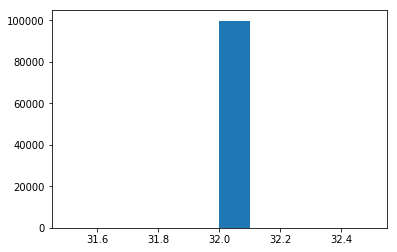

In [109]:
plt.hist(test_data.order_id.map(lambda x: len(str(x))))

(array([  9889., 287131.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  99895.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <a list of 10 Patch objects>)

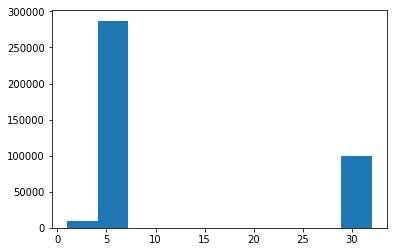

In [110]:
plt.hist(order_data.order_id.map(lambda x: len(str(x))))

> train data : order id → shorter ones

> test_data: order id → longer ones

> order_data: order id → all

## Merge Dataset

In [111]:
'''
Output image:


train_data.order_id   --- not for training

order_data.group_id     --- not for training
order_data.order_date      --- not for training
order_data.source_1
order_data.source_2
order_data.unit
order_data.people_amount

## TODO ##
order_date_week
order_date_month
date_diff_order_begin

group_data.sub_line
group_data.area
group_data.days
group_data.begin_date     --- not for training
group_data.price


## TODO ##
begin_date_day  (曜日)
begin_date_week      -- 相談待
begin_date_month
end_date_day   (曜日)
end_date_week         -- 相談待
end_date_month

## TODO ##
from airplane data:
for each group_id (pivot):  去程轉機次數, 回程轉機次數, 去程所需時間, 回程所需時間   (pay attention to time zone ?)


train_data.deal_or_not
'''

'\nOutput image:\n\n\ntrain_data.order_id   --- not for training\n\norder_data.group_id     --- not for training\norder_data.order_date      --- not for training\norder_data.source_1\norder_data.source_2\norder_data.unit\norder_data.people_amount\n\n## TODO ##\norder_date_week\norder_date_month\ndate_diff_order_begin\n\ngroup_data.sub_line\ngroup_data.area\ngroup_data.days\ngroup_data.begin_date     --- not for training\ngroup_data.price\n\n\n## TODO ##\nbegin_date_day  (曜日)\nbegin_date_week      -- 相談待\nbegin_date_month\nend_date_day   (曜日)\nend_date_week         -- 相談待\nend_date_month\n\n## TODO ##\nfrom airplane data:\nfor each group_id (pivot):  去程轉機次數, 回程轉機次數, 去程所需時間, 回程所需時間   (pay attention to time zone ?)\n\n\ntrain_data.deal_or_not\n'

In [112]:
# Merge          Ref: http://sinhrks.hatenablog.com/entry/2015/01/28/073327

In [113]:
t_o = pd.merge(train_data, order_data, on='order_id', how='left')

In [114]:
t_o

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,0,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2.0
1,140370,0,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1.0
2,211009,0,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2.0
3,41571,1,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4.0
4,64125,1,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1.0
5,76131,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0
6,238671,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0
7,5045,0,54305,20-Jan-17,src1_value_1,src2_value_1,unit_value_7,6.0
8,37230,0,54305,8-May-17,src1_value_2,src2_value_3,unit_value_6,2.0
9,138976,0,54305,8-May-17,src1_value_1,src2_value_1,unit_value_8,2.0


In [115]:
t_o[t_o['group_id'] == '63695']

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount


In [116]:
t_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297020 entries, 0 to 297019
Data columns (total 8 columns):
order_id         297020 non-null object
deal_or_not      297020 non-null int64
group_id         262144 non-null object
order_date       262144 non-null object
source_1         262144 non-null object
source_2         262144 non-null object
unit             262144 non-null object
people_amount    262144 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.4+ MB


In [117]:
group_data[group_data['group_id'] == '63695']

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [121]:
# in order to join, set the key type
t_o['group_id']=t_o['group_id'].astype(str)
group_data['group_id'] = group_data['group_id'].astype(str)

In [122]:
t_o_g = pd.merge(t_o, group_data, on='group_id',  how='left')

In [129]:
t_o_g.drop(['product_name', 'promotion_prog'], axis=1)

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount,sub_line,area,days,begin_date,price
0,136100,0,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2.0,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0
1,140370,0,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1.0,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0
2,211009,0,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2.0,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0
3,41571,1,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
4,64125,1,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
5,76131,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
6,238671,0,53481,19-Apr-17,src1_value_2,src2_value_2,unit_value_6,2.0,subline_value_1,area_value_1,12.0,17-May-17,112900.0
7,5045,0,54305,20-Jan-17,src1_value_1,src2_value_1,unit_value_7,6.0,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0
8,37230,0,54305,8-May-17,src1_value_2,src2_value_3,unit_value_6,2.0,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0
9,138976,0,54305,8-May-17,src1_value_1,src2_value_1,unit_value_8,2.0,subline_value_1,area_value_1,12.0,21-Jun-17,115900.0


In [131]:
'''
## TODO ##
上面好多NULL!!

1. Why ?
2. Solve / no Solve ?

'''

'\n## TODO ##\n上面好多NULL!!\n\n1. Why ?\n2. Solve / no Solve ?\n\n'